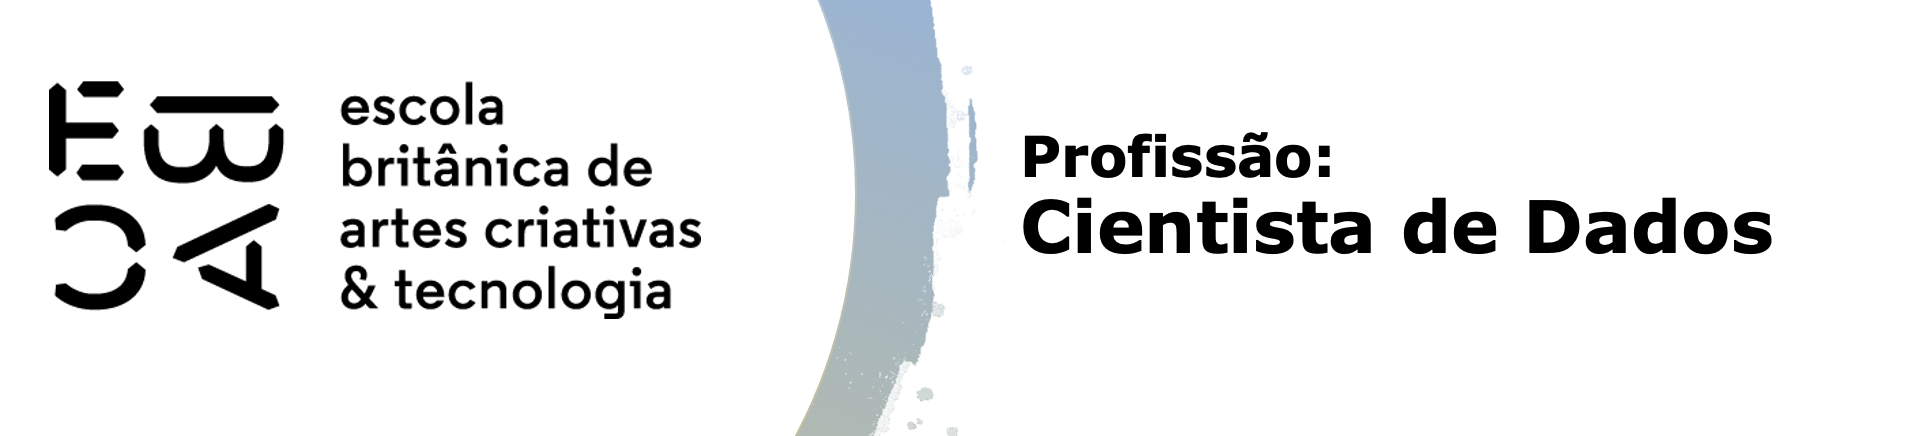

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.metrics         import confusion_matrix


In [2]:
X_train = pd.read_csv(
    filepath_or_buffer='./output/X_train.csv', 
    index_col=['Unnamed: 0', 'subject_train'])
X_train

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [3]:
y_train = (pd.read_csv(
    filepath_or_buffer='./input/UCI HAR Dataset/train/y_train.txt', 
    header=None).squeeze('columns'))
y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [4]:
X_test = pd.read_csv(
    filepath_or_buffer='./output/X_test.csv', 
    index_col=['Unnamed: 0', 'subject_test'])
X_test

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [5]:
y_test = (pd.read_csv(
    filepath_or_buffer='./input/UCI HAR Dataset/test/y_test.txt', 
    header=None).squeeze('columns'))
y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [6]:
%%time

cols = ['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']

X_train_1 = X_train[cols]
X_test_1  = X_test [cols]

clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=2360873)

caminho = clf.cost_complexity_pruning_path(X_train_1, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

CPU times: total: 62.5 ms
Wall time: 38.2 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [7]:
%%time


clf = DecisionTreeClassifier(random_state=2360873)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf, 
                    param_grid=grid_parametros, 
                    cv=10, 
                    verbose=100)

grid.fit(X_train_1, y_train)


resultados = pd.DataFrame(grid.cv_results_)
resultados

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START ccp_alpha=0.0.............................................
[CV 1/10; 1/11] END ..............ccp_alpha=0.0;, score=0.774 total time=   0.0s
[CV 2/10; 1/11] START ccp_alpha=0.0.............................................
[CV 2/10; 1/11] END ..............ccp_alpha=0.0;, score=0.732 total time=   0.0s
[CV 3/10; 1/11] START ccp_alpha=0.0.............................................
[CV 3/10; 1/11] END ..............ccp_alpha=0.0;, score=0.827 total time=   0.0s
[CV 4/10; 1/11] START ccp_alpha=0.0.............................................
[CV 4/10; 1/11] END ..............ccp_alpha=0.0;, score=0.683 total time=   0.0s
[CV 5/10; 1/11] START ccp_alpha=0.0.............................................
[CV 5/10; 1/11] END ..............ccp_alpha=0.0;, score=0.743 total time=   0.0s
[CV 6/10; 1/11] START ccp_alpha=0.0.............................................
[CV 6/10; 1/11] END ..............ccp_alpha=0.

[CV 10/10; 5/11] END ccp_alpha=0.00020584175583017689;, score=0.789 total time=   0.0s
[CV 1/10; 6/11] START ccp_alpha=0.000316912071380578............................
[CV 1/10; 6/11] END ccp_alpha=0.000316912071380578;, score=0.731 total time=   0.0s
[CV 2/10; 6/11] START ccp_alpha=0.000316912071380578............................
[CV 2/10; 6/11] END ccp_alpha=0.000316912071380578;, score=0.742 total time=   0.0s
[CV 3/10; 6/11] START ccp_alpha=0.000316912071380578............................
[CV 3/10; 6/11] END ccp_alpha=0.000316912071380578;, score=0.815 total time=   0.0s
[CV 4/10; 6/11] START ccp_alpha=0.000316912071380578............................
[CV 4/10; 6/11] END ccp_alpha=0.000316912071380578;, score=0.714 total time=   0.0s
[CV 5/10; 6/11] START ccp_alpha=0.000316912071380578............................
[CV 5/10; 6/11] END ccp_alpha=0.000316912071380578;, score=0.763 total time=   0.0s
[CV 6/10; 6/11] START ccp_alpha=0.000316912071380578............................
[CV 6/1

[CV 1/10; 11/11] END ccp_alpha=0.007082924052720332;, score=0.792 total time=   0.0s
[CV 2/10; 11/11] START ccp_alpha=0.007082924052720332...........................
[CV 2/10; 11/11] END ccp_alpha=0.007082924052720332;, score=0.808 total time=   0.0s
[CV 3/10; 11/11] START ccp_alpha=0.007082924052720332...........................
[CV 3/10; 11/11] END ccp_alpha=0.007082924052720332;, score=0.873 total time=   0.0s
[CV 4/10; 11/11] START ccp_alpha=0.007082924052720332...........................
[CV 4/10; 11/11] END ccp_alpha=0.007082924052720332;, score=0.771 total time=   0.0s
[CV 5/10; 11/11] START ccp_alpha=0.007082924052720332...........................
[CV 5/10; 11/11] END ccp_alpha=0.007082924052720332;, score=0.799 total time=   0.0s
[CV 6/10; 11/11] START ccp_alpha=0.007082924052720332...........................
[CV 6/10; 11/11] END ccp_alpha=0.007082924052720332;, score=0.790 total time=   0.0s
[CV 7/10; 11/11] START ccp_alpha=0.007082924052720332...........................
[CV 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039533,0.001954,0.001592,0.000493,0.0,{'ccp_alpha': 0.0},0.774457,0.732337,0.827211,0.682993,0.742857,0.714286,0.770068,0.793197,0.800000,0.763265,0.760067,0.040767,8
1,0.039688,0.001717,0.001803,0.000609,0.00002,{'ccp_alpha': 2.040261153427622e-05},0.774457,0.732337,0.827211,0.682993,0.742857,0.714286,0.770068,0.793197,0.800000,0.763265,0.760067,0.040767,8
2,0.039522,0.001321,0.001599,0.000486,0.000059,{'ccp_alpha': 5.918425528606344e-05},0.774457,0.732337,0.827211,0.682993,0.742857,0.714286,0.770068,0.793197,0.800000,0.763265,0.760067,0.040767,8
3,0.039399,0.001376,0.001297,0.000458,0.000097,{'ccp_alpha': 9.743287957185074e-05},0.774457,0.732337,0.827211,0.682993,0.742857,0.714286,0.770068,0.793197,0.800000,0.763265,0.760067,0.040767,8
4,0.039793,0.001245,0.001503,0.000501,0.000206,{'ccp_alpha': 0.00020584175583017689},0.771739,0.747283,0.810884,0.702041,0.751020,0.718367,0.779592,0.789116,0.819048,0.789116,0.767821,0.036078,6
5,0.040217,0.002770,0.001880,0.000304,0.000317,{'ccp_alpha': 0.000316912071380578},0.730978,0.741848,0.814966,0.714286,0.763265,0.752381,0.783673,0.795918,0.834014,0.791837,0.772317,0.036300,4
6,0.040959,0.001594,0.001940,0.000558,0.000432,{'ccp_alpha': 0.0004324280328325261},0.737772,0.724185,0.802721,0.715646,0.765986,0.751020,0.772789,0.793197,0.844898,0.783673,0.769189,0.037249,5
7,0.039518,0.001567,0.001595,0.000490,0.00068,{'ccp_alpha': 0.0006799038627112617},0.741848,0.724185,0.797279,0.704762,0.768707,0.731973,0.785034,0.731973,0.848980,0.786395,0.762113,0.041105,7
8,0.042200,0.002005,0.001708,0.000629,0.00112,{'ccp_alpha': 0.001120493079864795},0.764946,0.711957,0.838095,0.764626,0.748299,0.768707,0.814966,0.715646,0.838095,0.791837,0.775717,0.042774,3
9,0.042094,0.001454,0.001391,0.000493,0.002034,{'ccp_alpha': 0.0020342316461378998},0.802989,0.736413,0.850340,0.765986,0.742857,0.783673,0.831293,0.737415,0.831293,0.737415,0.781967,0.042209,2


In [8]:
grid.best_score_

0.8038638716356108

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [9]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train_1, y_train)
clf.score(X_test_1, y_test)

0.7207329487614523

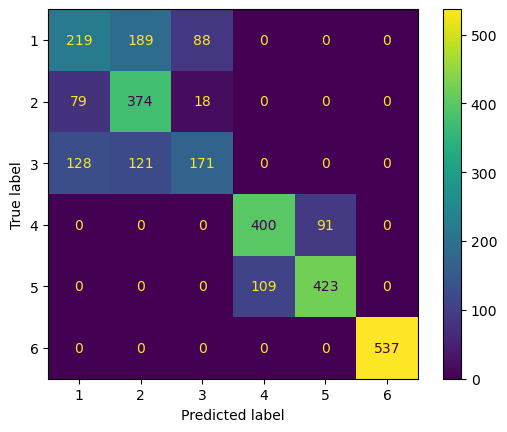

In [10]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test_1, 
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [11]:
matriz = confusion_matrix(y_true=y_test, 
                          y_pred=clf.predict(X_test_1))

matriz

array([[219, 189,  88,   0,   0,   0],
       [ 79, 374,  18,   0,   0,   0],
       [128, 121, 171,   0,   0,   0],
       [  0,   0,   0, 400,  91,   0],
       [  0,   0,   0, 109, 423,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

In [12]:
erros_por_classe = (np.sum(matriz, axis=1) + np.sum(matriz, axis=0)) - np.diag(matriz)
erros_por_classe

classe_maior_erro = np.max(erros_por_classe)
classe_maior_erro

781

In [13]:
y_train_2 = pd.Series(data=(y_train == 2),
                      name='classe_max_erro')
y_train_2

0       False
1       False
2       False
3       False
4       False
        ...  
7347     True
7348     True
7349     True
7350     True
7351     True
Name: classe_max_erro, Length: 7352, dtype: bool

In [14]:
clf_2 = DecisionTreeClassifier(min_samples_leaf=20,
                               max_depth=4,
                               random_state=42).fit(X=X_train,
                                                    y=y_train_2)

var_imp = (pd.DataFrame(data={'feature_importances': clf_2.feature_importances_,
                              'Variavel': X_train.columns})
                               .sort_values(by='feature_importances', ascending=False))

melhores_3_vars = var_imp['Variavel'].values[:3]

melhores_3_vars

array(['74 tGravityAcc-arCoeff()-Z,1', '331 fBodyAcc-bandsEnergy()-1,8',
       '427 fBodyGyro-std()-X'], dtype=object)

In [15]:
cols_2 = cols + melhores_3_vars.tolist()
X_train_1 = X_train[cols_2]
X_test_1 = X_test[cols_2]

clf_2 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

caminho_2 = clf_2.cost_complexity_pruning_path(X_train_1, y_train)
ccp_alphas_2, impurities_2 = caminho_2.ccp_alphas, caminho_2.impurities

ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

In [16]:
%%time


clf_2 = DecisionTreeClassifier(random_state=42)

grid_parametros_2 = {'ccp_alpha': ccp_alphas_2[::10]}

grid_2 = GridSearchCV(estimator=clf_2, 
                    param_grid=grid_parametros_2, 
                    cv=10, 
                    verbose=1)

grid_2.fit(X_train_1, y_train)


resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2

Fitting 10 folds for each of 11 candidates, totalling 110 fits
CPU times: total: 9.45 s
Wall time: 9.66 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.090369,0.014523,0.001868,0.000651,0.0,{'ccp_alpha': 0.0},0.801630,0.709239,0.827211,0.749660,0.817687,0.789116,0.850340,0.850340,0.884354,0.838095,0.811767,0.049190,7
1,0.082749,0.007242,0.001700,0.000642,0.000011,{'ccp_alpha': 1.1442734511286445e-05},0.801630,0.709239,0.827211,0.749660,0.817687,0.789116,0.850340,0.850340,0.884354,0.838095,0.811767,0.049190,7
2,0.083668,0.005941,0.001640,0.000533,0.000056,{'ccp_alpha': 5.561136577749619e-05},0.801630,0.709239,0.827211,0.749660,0.817687,0.789116,0.850340,0.850340,0.884354,0.838095,0.811767,0.049190,7
3,0.081801,0.007664,0.001190,0.000403,0.000119,{'ccp_alpha': 0.00011923113460110177},0.801630,0.709239,0.825850,0.749660,0.817687,0.789116,0.850340,0.850340,0.884354,0.838095,0.811631,0.049149,10
4,0.086889,0.005086,0.001623,0.000516,0.000295,{'ccp_alpha': 0.00029500664974005625},0.824728,0.716033,0.835374,0.772789,0.828571,0.790476,0.872109,0.835374,0.900680,0.853061,0.822920,0.049710,6
5,0.090384,0.003345,0.001895,0.000537,0.000477,{'ccp_alpha': 0.00047747693648216363},0.820652,0.735054,0.836735,0.776871,0.836735,0.791837,0.873469,0.848980,0.895238,0.851701,0.826727,0.045102,4
6,0.087055,0.005139,0.001566,0.000700,0.000747,{'ccp_alpha': 0.0007470444476063657},0.812500,0.748641,0.840816,0.767347,0.840816,0.783673,0.870748,0.836735,0.919728,0.836735,0.825774,0.047807,5
7,0.085232,0.004909,0.001490,0.000498,0.001058,{'ccp_alpha': 0.0010582659700748842},0.868207,0.752717,0.872109,0.772789,0.831293,0.778231,0.873469,0.851701,0.910204,0.839456,0.835018,0.048776,3
8,0.081395,0.002347,0.001805,0.000598,0.001699,{'ccp_alpha': 0.001698567304342407},0.866848,0.766304,0.884354,0.789116,0.824490,0.812245,0.891156,0.877551,0.903401,0.843537,0.845900,0.044080,2
9,0.081914,0.003643,0.001401,0.000482,0.004819,{'ccp_alpha': 0.004819010188773686},0.808424,0.826087,0.900680,0.814966,0.824490,0.816327,0.854422,0.885714,0.919728,0.832653,0.848349,0.037831,1


In [17]:
melhor_ccp_2 = resultados_2.iloc[grid_2.best_index_,4]

clf_2 = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp_2).fit(X_train_1, y_train)
clf_2.score(X_test_1, y_test)

0.7516118086189345

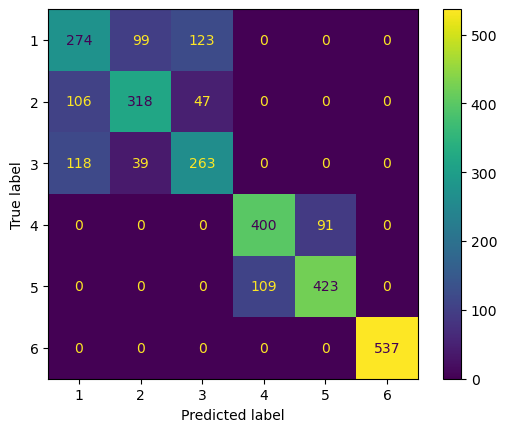

In [18]:
ConfusionMatrixDisplay.from_estimator(estimator=clf_2, 
                                      X=X_test_1, 
                                      y=y_test)
plt.show()